In [83]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [84]:
bike = pd.read_csv('day - day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [85]:


bike.shape

(730, 16)

In [86]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [87]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [88]:
# renaming columns 
bike.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

In [89]:
bike.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### i) instant is just a record index, this column can be removed.
### ii) dteday is date column and we already have month and year columns in dataframe. thus we can drop dteday columnas it not bringing any new information.

In [90]:
bike.drop(['instant'], axis=1,inplace=True)

In [91]:
bike.drop(['dteday'], axis=1,inplace=True)

In [92]:
bike

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### casual & registered ,Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [93]:
bike.drop(['casual'], axis=1,inplace=True)

In [94]:
bike.drop(['registered'], axis=1,inplace=True)

In [95]:
bike

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


# Data Visualisation

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
bike['Season'] = bike['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

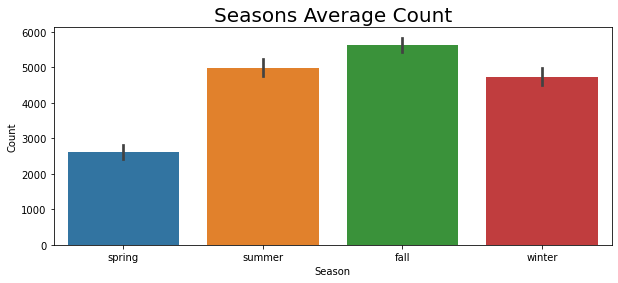

In [98]:
plt.figure(figsize=[10,4])
sns.barplot(bike['Season'],bike['Count'])
plt.title('Seasons Average Count', fontsize = 20)
plt.show()

### In fall, there seems to be highest demand of rented the bikes, followed by 3 and 2seasons
### 1 seems to be the least season where people rent bikes

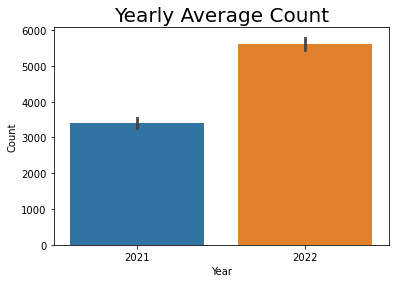

In [99]:
# mapping Year varible proper names for better visibilty

bike['Year'] = bike['Year'].map({0:'2021',1:'2022'})


# Visualising Yearly count of rented bikes

sns.barplot(bike['Year'],bike['Count'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

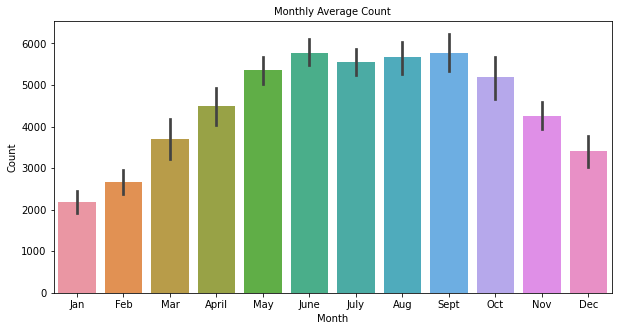

In [100]:
# mapping Month varible proper names for better visibilty

bike['Month'] = bike['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})


# Visualising Monthly count of rented bikes

plt.figure(figsize=[10,5])
sns.barplot(bike['Month'],bike['Count'])
plt.title('Monthly Average Count', fontsize = 10)
plt.show()


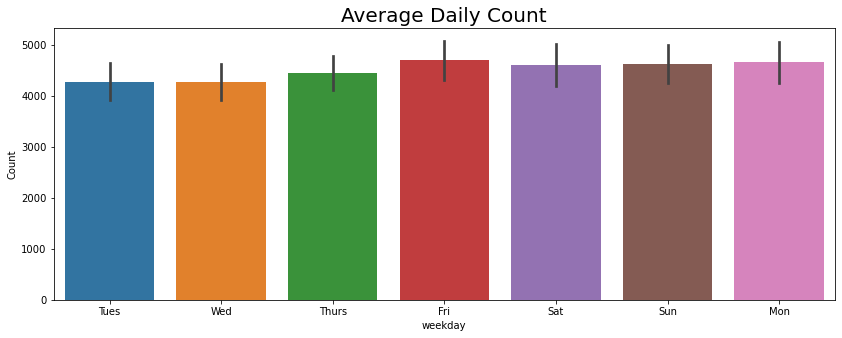

In [101]:
# mapping weekday variable proper names for better visibilty

bike['weekday'] = bike['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

# Visualising Daily count of rented bikes

plt.figure(figsize=[14,5])
sns.barplot(bike['weekday'],bike['Count'])
plt.title('Average Daily Count', fontsize = 20)
plt.show()

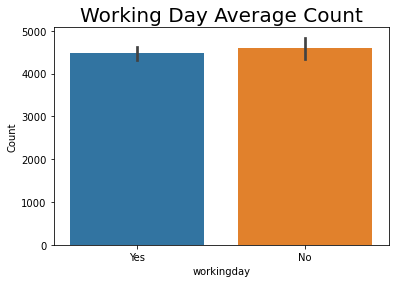

In [102]:
# mapping workingday varible proper names for better visibilty

bike['workingday'] = bike['workingday'].map({0:'No',1:'Yes'})

# Visualising Working day count of rented bikes

sns.barplot(bike['workingday'],bike['Count'])

plt.title('Working Day Average Count', fontsize = 20)
plt.show()

In [103]:
bike['Weather'] = bike['Weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})



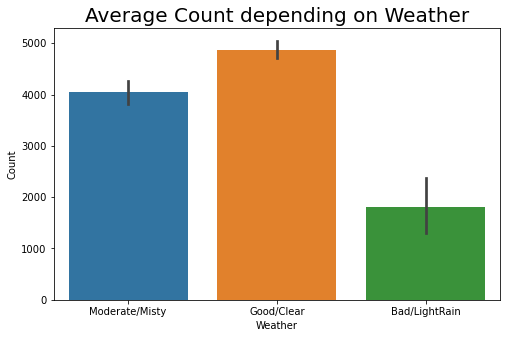

In [104]:
# Visualising Daily count of rented bikes

plt.figure(figsize=[8,5])
sns.barplot(bike['Weather'],bike['Count'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

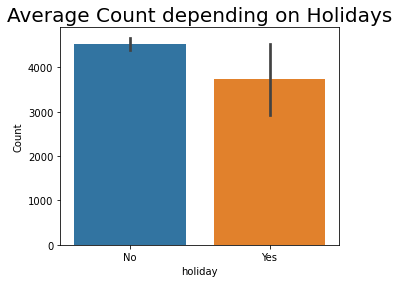

In [105]:
# mapping Holiday varible proper names for better visibilty

bike['holiday'] = bike['holiday'].map({0:'No',1:'Yes'})

# Visualising Holiday wise count of rented bikes

plt.figure(figsize=[5,4])
sns.barplot(bike['holiday'],bike['Count'])
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

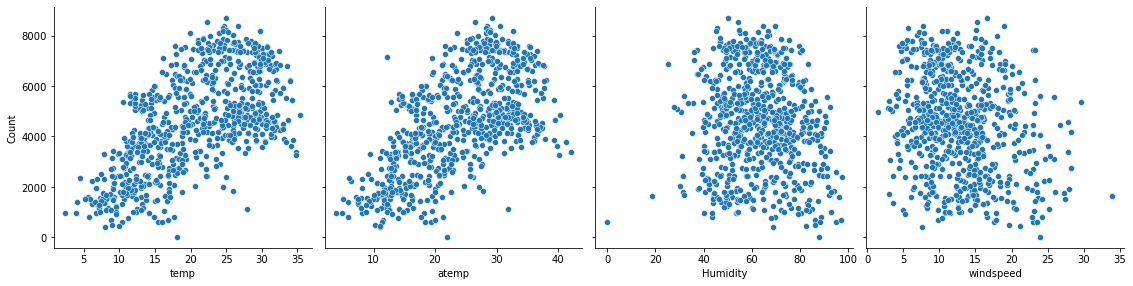

In [106]:
sns.pairplot(bike, x_vars=['temp','atemp','Humidity','windspeed'], y_vars='Count',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

### as can be seen from above plots, there is some linear relation between temp, atemp with Count.
### this shows that we can do linear regression for solving the problem.

In [107]:
# creating a list and putting all category columns in to it and converting them to category data type

cat = ['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday', 'Weather']

for i in cat:
    bike[i] = bike[i].astype('category')

In [108]:
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,2021,Jan,No,Tues,Yes,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2021,Jan,No,Wed,Yes,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2021,Jan,No,Thurs,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2021,Jan,No,Fri,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2021,Jan,No,Sat,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


In [109]:
# for Linear model creating dummies

dummy = pd.get_dummies(bike[cat], drop_first=True)
dummy.head()


,Season_spring,Season_summer,Season_winter,Year_2022,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [110]:
# Combining both the dataframe, bike_1 and of dummy variables

bike = pd.concat([bike,dummy], axis=1)
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,spring,2021,Jan,No,Tues,Yes,Moderate/Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,1,0,1
1,spring,2021,Jan,No,Wed,Yes,Moderate/Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,1,0,1
2,spring,2021,Jan,No,Thurs,Yes,Good/Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,1,0
3,spring,2021,Jan,No,Fri,Yes,Good/Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,1,0
4,spring,2021,Jan,No,Sat,Yes,Good/Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,1,1,0


In [111]:
# dropping columns from which dummy varibles were created

bike.drop(cat, axis=1, inplace = True)

In [112]:
bike.head()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2022,Month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [113]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   Humidity                730 non-null    float64
 3   windspeed               730 non-null    float64
 4   Count                   730 non-null    int64  
 5   Season_spring           730 non-null    uint8  
 6   Season_summer           730 non-null    uint8  
 7   Season_winter           730 non-null    uint8  
 8   Year_2022               730 non-null    uint8  
 9   Month_Aug               730 non-null    uint8  
 10  Month_Dec               730 non-null    uint8  
 11  Month_Feb               730 non-null    uint8  
 12  Month_Jan               730 non-null    uint8  
 13  Month_July              730 non-null    uint8  
 14  Month_June              730 non-null    ui

## Train - Test Split

In [114]:
# importing statsmodel and sklearn libraries for Linear regression model building

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [115]:
# splitting the date into two train and test dataframes

df_train_bike_new, df_test_bike_new = train_test_split(bike, train_size=0.70, random_state=100)

## Rescaling the features using MinMax Scaler

In [116]:
# importing MinMax scaler from preprocessing module of sklearn library

from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler()

In [118]:
bike.columns

Index(['temp', 'atemp', 'Humidity', 'windspeed', 'Count', 'Season_spring',
       'Season_summer', 'Season_winter', 'Year_2022', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sept', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'workingday_Yes', 'Weather_Good/Clear',
       'Weather_Moderate/Misty'],
      dtype='object')

In [119]:
# performing scaling on all the numericals variables of train dataset and leaving Count variable aside

num_vars = ['temp', 'atemp', 'Humidity', 'windspeed', 'Count']

df_train_bike_new[num_vars] = scaler.fit_transform(df_train_bike_new[num_vars])
df_train_bike_new[num_vars].head()

,temp,atemp,Humidity,windspeed,Count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


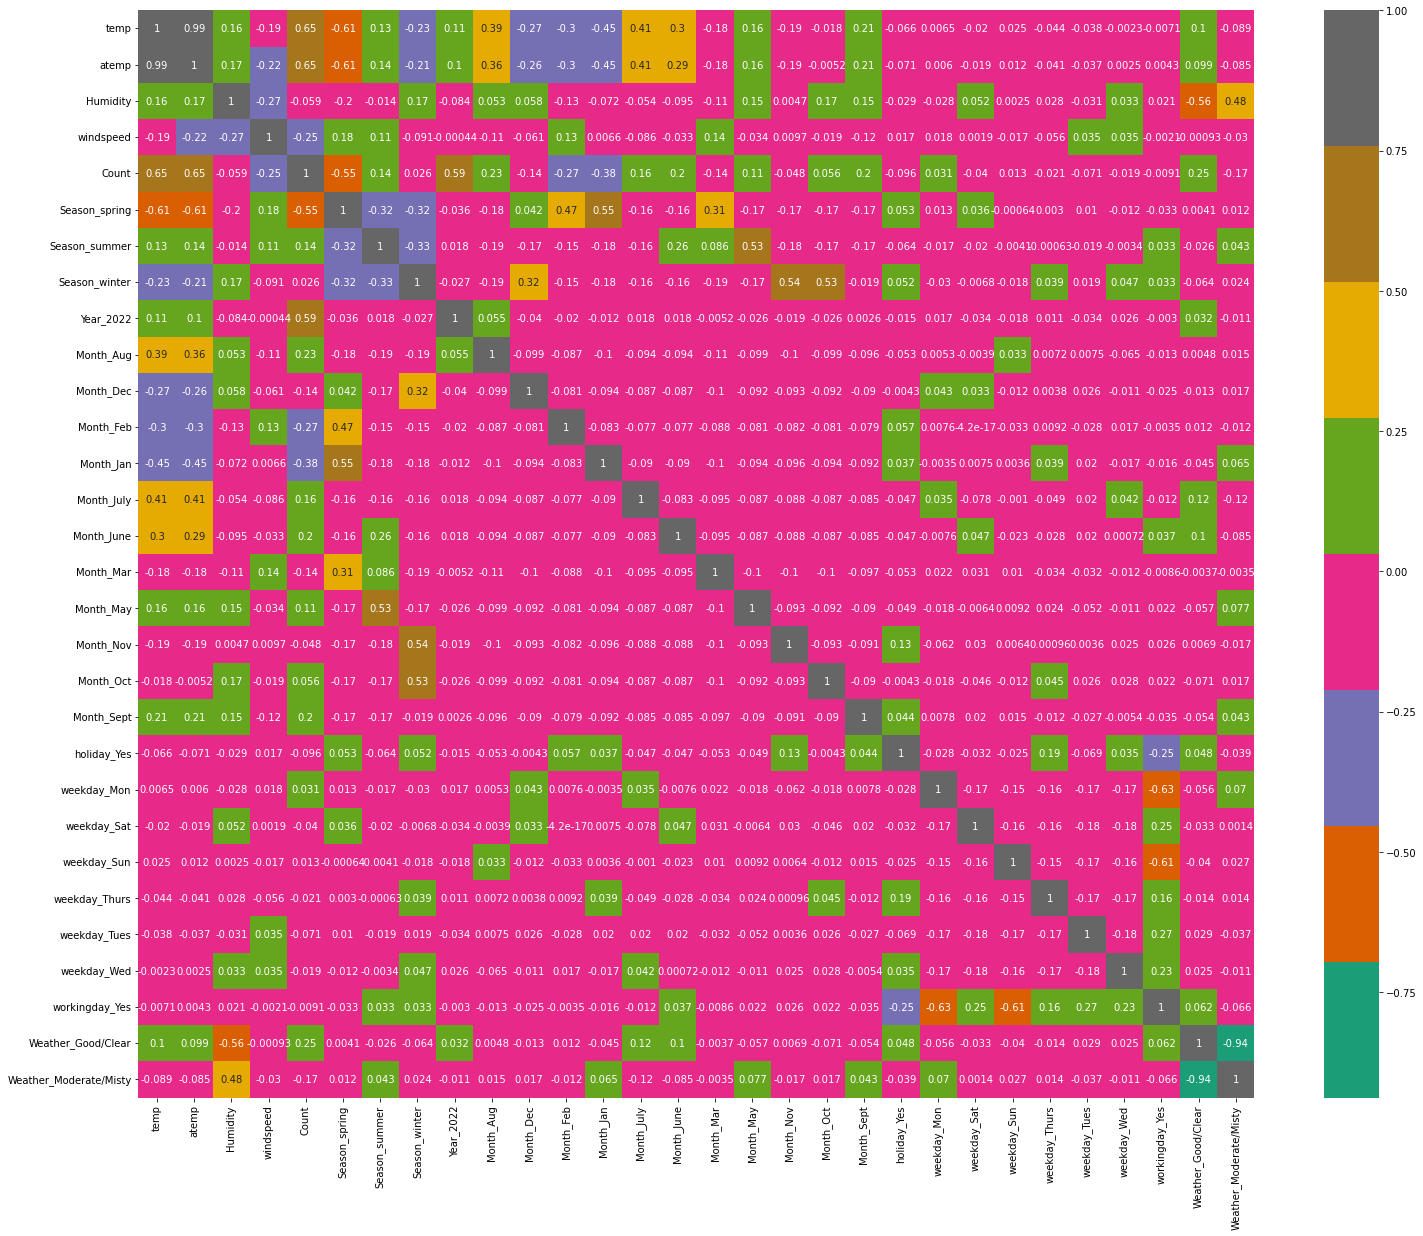

In [120]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(df_train_bike_new.corr(),annot =True, cmap= 'Dark2')
plt.show()

# Model Building

In [121]:
# Dividing training set into X_train and y_train sets for the model building

y_train = df_train_bike_new.pop('Count')
X_train = df_train_bike_new

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


## RFE
#### Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [122]:
#importing RFE library for feature selection and after this will perform manual feature selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [123]:
# using RFE for feature selection and  limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [124]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 3),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', True, 1),
 ('Season_winter', True, 1),
 ('Year_2022', True, 1),
 ('Month_Aug', False, 10),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 2),
 ('Month_Jan', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 12),
 ('Month_Mar', False, 15),
 ('Month_May', False, 9),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 13),
 ('Month_Sept', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 5),
 ('weekday_Thurs', False, 11),
 ('weekday_Tues', False, 8),
 ('weekday_Wed', False, 7),
 ('workingday_Yes', False, 4),
 ('Weather_Good/Clear', True, 1),
 ('Weather_Moderate/Misty', True, 1)]

In [125]:
#creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temp', 'Humidity', 'windspeed', 'Season_spring', 'Season_summer',
       'Season_winter', 'Year_2022', 'Month_Dec', 'Month_Jan', 'Month_July',
       'Month_Nov', 'Month_Sept', 'holiday_Yes', 'Weather_Good/Clear',
       'Weather_Moderate/Misty'],
      dtype='object')

In [126]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,temp,Humidity,windspeed,Season_spring,Season_summer,Season_winter,Year_2022,Month_Dec,Month_Jan,Month_July,Month_Nov,Month_Sept,holiday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,0,1,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,1,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,1


## Model-1

In [127]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          8.15e-189
Time:                        14:19:18   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0732      0.048      1.540      0.124      -0.020       0.167
temp                       0.4815      0.037     13.005      0.000       0.409       0.554
Humidity                  -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                 -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Season_spring             -0.0613      0.021     -2.881      0.004      -0.103      -0.019
Season_summer              0.0423      0.015      2.761      0.006       0.012       0.072
Season_winter              0.1019      0.018      5.656      0.000       0.067       0.137
Year_2022                  0.2304      0.008     28.487      0.000       0.215       0.246
Month_Dec                 -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Month_Jan                 -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Month_July                -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Month_Nov                 -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Month_Sept                 0.0755      0.017      4.466      0.000       0.042       0.109
holiday_Yes               -0.0911      0.026     -3.557      0.000      -0.141      -0.041
Weather_Good/Clear         0.2465      0.026      9.331      0.000       0.195       0.298
Weather_Moderate/Misty     0.1922      0.025      7.687      0.000       0.143       0.241
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Humidity,26.33
0,temp,25.12
13,Weather_Good/Clear,15.65
14,Weather_Moderate/Misty,9.30
3,Season_spring,5.75
2,windspeed,4.67
5,Season_winter,4.53
4,Season_summer,3.30
6,Year_2022,2.10
10,Month_Nov,1.91


In [129]:
#removing feature - Humidity due very high VIF values as all the p-values < 0.05.
X_train_rfe2 = X_train_rfe.drop('Humidity', axis = 1)

## Model 2

In [130]:

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          4.75e-186
Time:                        14:19:18   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0467      0.039     -1.194      0.233      -0.124       0.030
temp                       0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                 -0.1585      0.025     -6.276      0.000      -0.208      -0.109
Season_spring             -0.0713      0.021     -3.314      0.001      -0.113      -0.029
Season_summer              0.0349      0.015      2.251      0.025       0.004       0.065
Season_winter              0.0869      0.018      4.831      0.000       0.052       0.122
Year_2022                  0.2345      0.008     28.687      0.000       0.218       0.251
Month_Dec                 -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Month_Jan                 -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Month_July                -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Month_Nov                 -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Month_Sept                 0.0687      0.017      4.015      0.000       0.035       0.102
holiday_Yes               -0.0918      0.026     -3.522      0.000      -0.143      -0.041
Weather_Good/Clear         0.2917      0.025     11.840      0.000       0.243       0.340
Weather_Moderate/Misty     0.2117      0.025      8.462      0.000       0.163       0.261
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Weather_Good/Clear,15.65
0,temp,14.02
13,Weather_Moderate/Misty,8.82
1,windspeed,4.66
2,Season_spring,4.41
4,Season_winter,3.36
3,Season_summer,2.78
5,Year_2022,2.08
9,Month_Nov,1.89
7,Month_Jan,1.74


In [132]:
# even temp and Weather_Good/Clear has value way higher VIF but from data dictionary and EDA we get that they play a major role in the demand of bikes. thus we are retaining them as of now.
# all the p-values < 0.05.
#removing feature - 'Weather_Moderate/Misty' due very high VIF

# Model-3

In [133]:
X_train_rfe3 = X_train_rfe2.drop('Weather_Moderate/Misty', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     169.1
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.01e-172
Time:                        14:19:19   Log-Likelihood:                 470.40
No. Observations:                 510   AIC:                            -912.8
Df Residuals:                     496   BIC:                            -853.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1442      0.034      4.222      0.000       0.077       0.211
temp                   0.4520      0.039     11.669      0.000       0.376       0.528
windspeed             -0.1798      0.027     -6.695      0.000      -0.233      -0.127
Season_spring         -0.0662      0.023     -2.881      0.004      -0.111      -0.021
Season_summer          0.0405      0.017      2.447      0.015       0.008       0.073
Season_winter          0.0776      0.019      4.043      0.000       0.040       0.115
Year_2022              0.2380      0.009     27.280      0.000       0.221       0.255
Month_Dec             -0.0317      0.019     -1.674      0.095      -0.069       0.005
Month_Jan             -0.0410      0.020     -2.091      0.037      -0.080      -0.002
Month_July            -0.0554      0.020     -2.802      0.005      -0.094      -0.017
Month_Nov             -0.0296      0.020     -1.449      0.148      -0.070       0.011
Month_Sept             0.0667      0.018      3.647      0.000       0.031       0.103
holiday_Yes           -0.0874      0.028     -3.139      0.002      -0.142      -0.033
Weather_Good/Clear     0.0960      0.009     10.571      0.000       0.078       0.114
==============================================================================
Omnibus:                      101.079   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.095
Skew:                          -0.908   Prob(JB):                     1.55e-71
Kurtosis:                       6.471   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.85
1,windspeed,4.61
2,Season_spring,2.96
4,Season_winter,2.85
12,Weather_Good/Clear,2.73
3,Season_summer,2.21
5,Year_2022,2.07
9,Month_Nov,1.82
7,Month_Jan,1.64
8,Month_July,1.60


In [135]:
#removing feature - 'Month_Nov' coz high p-values(0.148).

# Model-4

In [136]:
X_train_rfe4 = X_train_rfe3.drop('Month_Nov', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     182.6
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.07e-173
Time:                        14:19:21   Log-Likelihood:                 469.32
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     497   BIC:                            -857.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1324      0.033      3.988      0.000       0.067       0.198
temp                   0.4664      0.037     12.446      0.000       0.393       0.540
windspeed             -0.1802      0.027     -6.703      0.000      -0.233      -0.127
Season_spring         -0.0602      0.023     -2.661      0.008      -0.105      -0.016
Season_summer          0.0446      0.016      2.729      0.007       0.012       0.077
Season_winter          0.0706      0.019      3.796      0.000       0.034       0.107
Year_2022              0.2378      0.009     27.233      0.000       0.221       0.255
Month_Dec             -0.0209      0.017     -1.199      0.231      -0.055       0.013
Month_Jan             -0.0375      0.019     -1.922      0.055      -0.076       0.001
Month_July            -0.0552      0.020     -2.790      0.005      -0.094      -0.016
Month_Sept             0.0708      0.018      3.916      0.000       0.035       0.106
holiday_Yes           -0.0923      0.028     -3.334      0.001      -0.147      -0.038
Weather_Good/Clear     0.0953      0.009     10.494      0.000       0.077       0.113
==============================================================================
Omnibus:                       94.595   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.484
Skew:                          -0.868   Prob(JB):                     3.75e-63
Kurtosis:                       6.242   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.79
1,windspeed,4.57
2,Season_spring,2.96
11,Weather_Good/Clear,2.71
3,Season_summer,2.21
5,Year_2022,2.07
4,Season_winter,2.00
7,Month_Jan,1.64
8,Month_July,1.59
9,Month_Sept,1.33


In [138]:
#removing feature - 'Month_Dec' coz of high p-values(0.231).
X_train_rfe5 = X_train_rfe4.drop('Month_Dec', axis = 1)


# Model-5

In [139]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.93e-174
Time:                        14:19:23   Log-Likelihood:                 468.59
No. Observations:                 510   AIC:                            -913.2
Df Residuals:                     498   BIC:                            -862.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1230      0.032      3.811      0.000       0.060       0.186
temp                   0.4767      0.036     13.062      0.000       0.405       0.548
windspeed             -0.1767      0.027     -6.610      0.000      -0.229      -0.124
Season_spring         -0.0591      0.023     -2.614      0.009      -0.104      -0.015
Season_summer          0.0468      0.016      2.880      0.004       0.015       0.079
Season_winter          0.0693      0.019      3.733      0.000       0.033       0.106
Year_2022              0.2378      0.009     27.218      0.000       0.221       0.255
Month_Jan             -0.0324      0.019     -1.704      0.089      -0.070       0.005
Month_July            -0.0555      0.020     -2.804      0.005      -0.094      -0.017
Month_Sept             0.0725      0.018      4.018      0.000       0.037       0.108
holiday_Yes           -0.0913      0.028     -3.298      0.001      -0.146      -0.037
Weather_Good/Clear     0.0951      0.009     10.472      0.000       0.077       0.113
==============================================================================
Omnibus:                       92.324   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.195
Skew:                          -0.854   Prob(JB):                     1.75e-60
Kurtosis:                       6.168   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.78
1,windspeed,4.57
2,Season_spring,2.84
10,Weather_Good/Clear,2.71
3,Season_summer,2.21
5,Year_2022,2.07
4,Season_winter,1.74
6,Month_Jan,1.60
7,Month_July,1.59
8,Month_Sept,1.33


In [141]:
#removing feature - 'Month_Jan' coz of high p-values(0.089).
X_train_rfe6 = X_train_rfe5.drop('Month_Jan', axis = 1)


# Model-6

In [142]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          8.19e-175
Time:                        14:19:24   Log-Likelihood:                 467.10
No. Observations:                 510   AIC:                            -912.2
Df Residuals:                     499   BIC:                            -865.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1088      0.031      3.483      0.001       0.047       0.170
temp                   0.4927      0.035     13.944      0.000       0.423       0.562
windspeed             -0.1706      0.027     -6.427      0.000      -0.223      -0.118
Season_spring         -0.0638      0.022     -2.836      0.005      -0.108      -0.020
Season_summer          0.0494      0.016      3.048      0.002       0.018       0.081
Season_winter          0.0745      0.018      4.063      0.000       0.038       0.111
Year_2022              0.2372      0.009     27.118      0.000       0.220       0.254
Month_July            -0.0569      0.020     -2.872      0.004      -0.096      -0.018
Month_Sept             0.0729      0.018      4.033      0.000       0.037       0.108
holiday_Yes           -0.0919      0.028     -3.315      0.001      -0.146      -0.037
Weather_Good/Clear     0.0957      0.009     10.529      0.000       0.078       0.114
==============================================================================
Omnibus:                       91.943   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.468
Skew:                          -0.850   Prob(JB):                     2.51e-60
Kurtosis:                       6.166   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.75
1,windspeed,4.55
9,Weather_Good/Clear,2.71
3,Season_summer,2.19
2,Season_spring,2.12
5,Year_2022,2.06
4,Season_winter,1.74
6,Month_July,1.59
7,Month_Sept,1.32
8,holiday_Yes,1.04


In [144]:
#removing feature - 'Month_July' coz of high collinearity with temp variable.
X_train_rfe7 = X_train_rfe6.drop('Month_July', axis = 1)

# Model-7

In [145]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.5
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          3.04e-174
Time:                        14:19:27   Log-Likelihood:                 462.92
No. Observations:                 510   AIC:                            -905.8
Df Residuals:                     500   BIC:                            -863.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1009      0.031      3.218      0.001       0.039       0.162
temp                   0.4782      0.035     13.576      0.000       0.409       0.547
windspeed             -0.1711      0.027     -6.398      0.000      -0.224      -0.119
Season_spring         -0.0509      0.022     -2.292      0.022      -0.094      -0.007
Season_summer          0.0665      0.015      4.382      0.000       0.037       0.096
Season_winter          0.0884      0.018      4.958      0.000       0.053       0.123
Year_2022              0.2378      0.009     27.008      0.000       0.221       0.255
Month_Sept             0.0884      0.017      5.083      0.000       0.054       0.123
holiday_Yes           -0.0906      0.028     -3.245      0.001      -0.145      -0.036
Weather_Good/Clear     0.0944      0.009     10.318      0.000       0.076       0.112
==============================================================================
Omnibus:                       94.652   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.230
Skew:                          -0.883   Prob(JB):                     1.04e-60
Kurtosis:                       6.144   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.66
1,windspeed,4.54
8,Weather_Good/Clear,2.70
5,Year_2022,2.06
2,Season_spring,2.02
3,Season_summer,1.85
4,Season_winter,1.57
6,Month_Sept,1.22
7,holiday_Yes,1.04


In [147]:
#removing feature - 'Season_spring' coz of high negative collinearity with temp variable.
X_train_rfe8 = X_train_rfe7.drop('Season_spring', axis = 1)

# Model-8

In [148]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe8)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.2
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.45e-174
Time:                        14:19:29   Log-Likelihood:                 460.26
No. Observations:                 510   AIC:                            -902.5
Df Residuals:                     501   BIC:                            -864.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0417      0.018      2.337      0.020       0.007       0.077
temp                   0.5428      0.021     25.540      0.000       0.501       0.585
windspeed             -0.1756      0.027     -6.559      0.000      -0.228      -0.123
Season_summer          0.0903      0.011      8.152      0.000       0.069       0.112
Season_winter          0.1205      0.011     10.863      0.000       0.099       0.142
Year_2022              0.2366      0.009     26.806      0.000       0.219       0.254
Month_Sept             0.0978      0.017      5.761      0.000       0.064       0.131
holiday_Yes           -0.0928      0.028     -3.312      0.001      -0.148      -0.038
Weather_Good/Clear     0.0939      0.009     10.226      0.000       0.076       0.112
==============================================================================
Omnibus:                       88.063   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.486
Skew:                          -0.853   Prob(JB):                     1.21e-51
Kurtosis:                       5.851   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.35
1,windspeed,3.08
7,Weather_Good/Clear,2.55
4,Year_2022,2.00
2,Season_summer,1.55
3,Season_winter,1.33
5,Month_Sept,1.20
6,holiday_Yes,1.04


### This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.

## Residual Analysis Of Training Data

In [150]:
y_train_pred = lr8.predict(X_train_lm8)

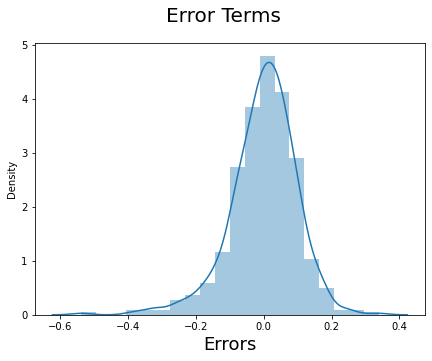

In [151]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()


In [152]:
# From the above histogram, we could see that the Residuals are normally distributed

##  Check for Homoscedasticity

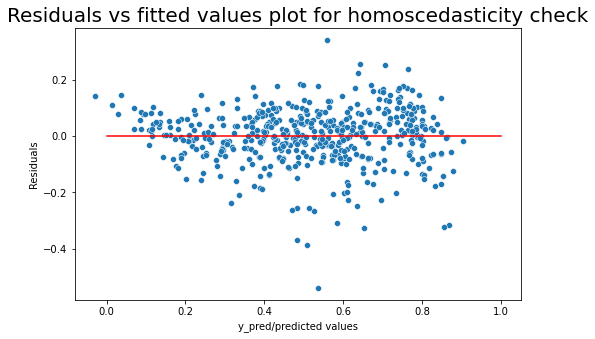

In [153]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)


## MAKING PREDICTION USING FINAL MODEL

In [154]:
# Apply scaler() to all numeric variables in test dataset. 

df_test_bike_new[num_vars] = scaler.transform(df_test_bike_new[num_vars])
df_test_bike_new.head()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2022,Month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [155]:
# Dividing test set into X_test and y_test sets for the model building

y_test = df_test_bike_new.pop('Count')
X_test = df_test_bike_new

print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [156]:
#Selecting the variables that were part of final model (Model 8).
col_test = X_train_rfe8.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.head()


,const,temp,windspeed,Season_summer,Season_winter,Year_2022,Month_Sept,holiday_Yes,Weather_Good/Clear
184,1.0,0.831783,0.084219,0,0,0,0,1,0
535,1.0,0.901354,0.153728,1,0,1,0,0,1
299,1.0,0.511964,0.334206,0,1,0,0,0,0
221,1.0,0.881625,0.339570,0,0,0,0,0,1
152,1.0,0.817246,0.537414,1,0,0,0,0,1


In [157]:
# Making predictions using the final model (lr8)

y_test_pred = lr8.predict(X_test_lm8)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

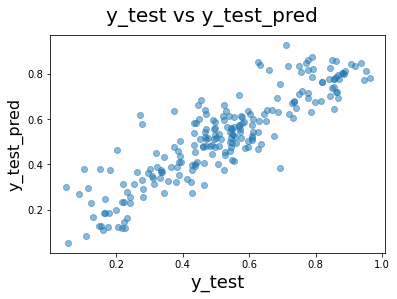

In [158]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

### We can see there is linear relationship between y_test and y_test_pred

## Residaul Analysis

In [159]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 78.32
Train data r^2 : 80.84


## Adjusted R^2 Value for TEST

In [160]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe8.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe8.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 77.5
Train data adjusted r^2 : 80.53


#### Test data r^2 : 78.32
#### Train data r^2 : 80.84
#### Test data adjusted r^2 : 77.5
#### Train data adjusted r^2 : 80.53
#### This seems to be a really good model

### As per our final Model, the below predictor variables influences bike booking :
### Temperature (temp)
### September Month
### Year -2021
### Summer Seaon
### Winter Seson
### If its a holiday
### If the weather is clear/Good
### Speed of the Wind